<a href="https://colab.research.google.com/github/PhaneendraYedidi/Machine-Learning-Practices/blob/master/Exploratory_Data_Analysis1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Information**:  Habermen Dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

In [2]:
#To access the haberman dataset present on Google Drive, below code was used 

# Install the PyDrive wrapper & import libraries.
# This only needs to be done once per notebook.
! pip install pydrive

# these classes allow you to request the Google drive API
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive 
from google.colab import auth 
from oauth2client.client import GoogleCredentials
import pandas as pd


# 1. Authenticate and create the PyDrive client.
# This only needs to be done once per notebook.

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

file_id = '1CL568ARMKCu2XvcYzhvmEAN66EY-u5cW'
downloaded = drive.CreateFile({'id': file_id})
# allows you to temporarily load your file in the notebook VM

downloaded.GetContentFile('haberman.csv')

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

#Load haberman.csv into a pandas dataFrame.
haberman = pd.read_csv("haberman.csv")

In [3]:
# No of data points and features
haberman.shape

(306, 4)

In [4]:
#list of columns in haberman dataset
print(haberman.columns)

Index(['age', 'year', 'nodes', 'status'], dtype='object')


**Attribute Information**:

Age of patient at time of operation (numerical)

Patient's year of operation (year - 1900, numerical)

Number of positive axillary nodes detected (numerical)

Survival status (class attribute) 1 = the patient survived 5 years or longer 2 = the patient died within 5 year

In [5]:
#find if any imbalance data

haberman['status'].value_counts()

1    225
2     81
Name: status, dtype: int64

In [6]:
haberman.head(5)

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


**Observations**: 
1.   Number of points : 306
2.   Numer of features : 3 i.e., age, year and nodes
3.   Number of classes: 1 i.e., status
4.   Data-points per class: status (1) :- 225 points,  status  (2) :- 81 points






**Objective**:
Predict the survival of patients who had undergone surgery for breast cancer.

**Univariate Analysis**

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


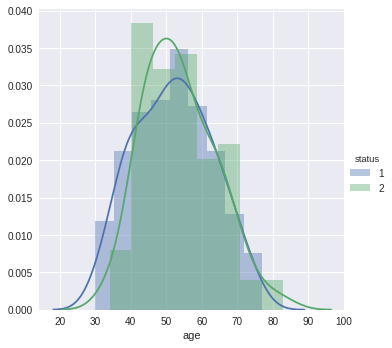

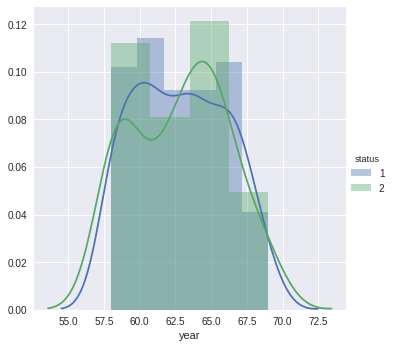

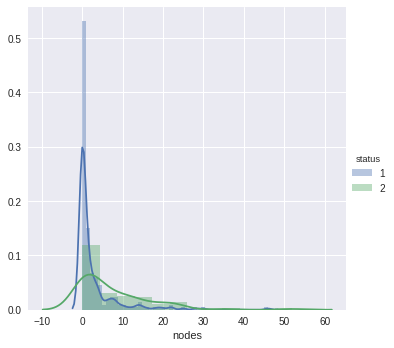

In [7]:
#Distribution plot - PDF
sns.FacetGrid(haberman, hue='status', size=5) \
  .map(sns.distplot,'age').add_legend()
sns.FacetGrid(haberman, hue='status', size=5) \
  .map(sns.distplot,'year').add_legend()
sns.FacetGrid(haberman, hue='status', size=5) \
  .map(sns.distplot,'nodes').add_legend()
plt.show();

[30.  35.3 40.6 45.9 51.2 56.5 61.8 67.1 72.4 77.7 83. ]
[58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


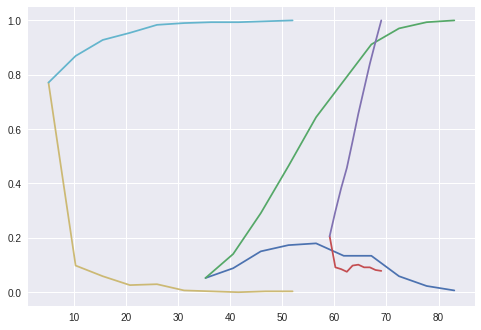

In [8]:
#Cumulative Distribution Function CDF

counts, bin_edges = np.histogram(haberman['age'], bins=10, density = True)

pdf = counts/(sum(counts))
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)

counts, bin_edges = np.histogram(haberman['year'], bins=10, density = True)

pdf = counts/(sum(counts))
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)

counts, bin_edges = np.histogram(haberman['nodes'], bins=10, density = True)

pdf = counts/(sum(counts))
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)

In [9]:
#Mean and Std-Dev

print("Means:")
print(np.mean(haberman['age']))
print(np.mean(haberman['year']))
print(np.mean(haberman['nodes']))

print("\nStandard Deviation")
print(np.std(haberman['age']))
print(np.std(haberman['year']))
print(np.std(haberman['nodes']))

Means:
52.45751633986928
62.85294117647059
4.026143790849673

Standard Deviation
10.78578520363183
3.244090833563246
7.177896092811152


In [10]:
# Median, Percentile, Quantile, IQR, MAD

print("\nMedian")
print(np.median(haberman['age']))
print(np.median(haberman['year']))
print(np.median(haberman['nodes']))

print('\nQuantiles')
print(np.percentile(haberman['age'],np.arange(0,100,25)))
print(np.percentile(haberman['year'],np.arange(0,100,25)))
print(np.percentile(haberman['nodes'],np.arange(0,100,25)))

print("\n 90th percentile")
print(np.percentile(haberman['age'],90))
print(np.percentile(haberman['year'],90))
print(np.percentile(haberman['nodes'],90))

from statsmodels import robust
print("\n Median Absolute Deviation")
print(robust.mad(haberman['age']))
print(robust.mad(haberman['year']))
print(robust.mad(haberman['nodes']))



Median
52.0
63.0
1.0

Quantiles
[30.   44.   52.   60.75]
[58.   60.   63.   65.75]
[0. 0. 1. 4.]

 90th percentile
67.0
67.0
13.0

 Median Absolute Deviation
11.860817748044816
4.447806655516806
1.482602218505602


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


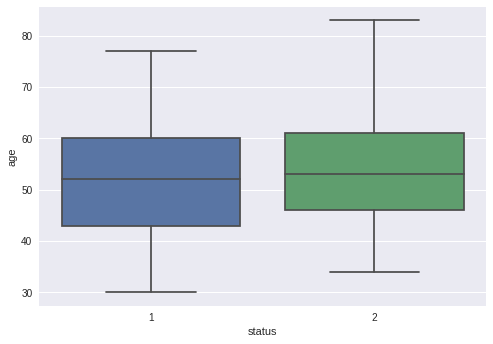

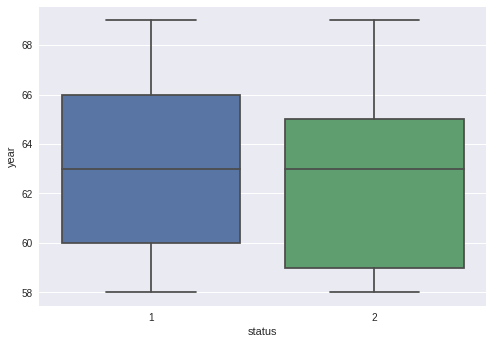

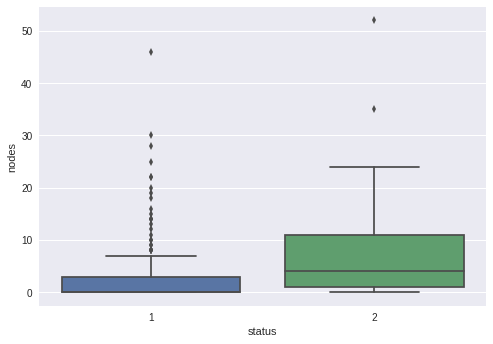

In [11]:
#Box plots and Whiskers

sns.boxplot(x='status', y='age', data=haberman)
plt.show()

sns.boxplot(x='status', y='year', data=haberman)
plt.show()

sns.boxplot(x='status', y='nodes', data=haberman)
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:588: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:816: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


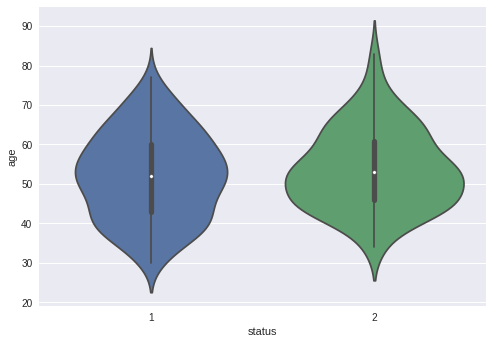

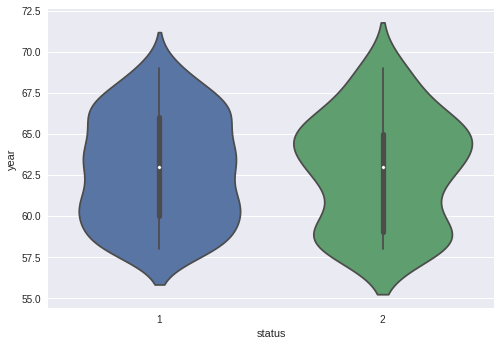

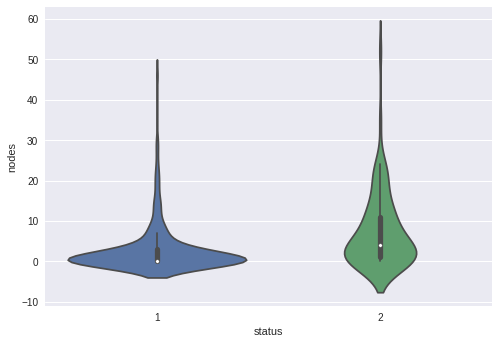

In [12]:
#violin plot
sns.violinplot(x="status", y="age", data=haberman, size=8)
plt.show()

sns.violinplot(x="status", y="year", data=haberman, size=8)
plt.show()

sns.violinplot(x="status", y="nodes", data=haberman, size=8)
plt.show()

**Bi-Variate Analysis**

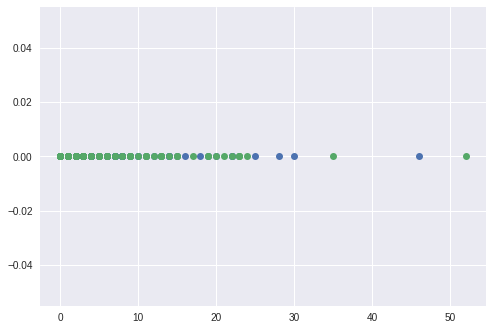

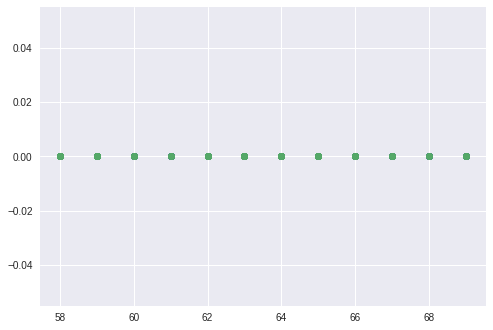

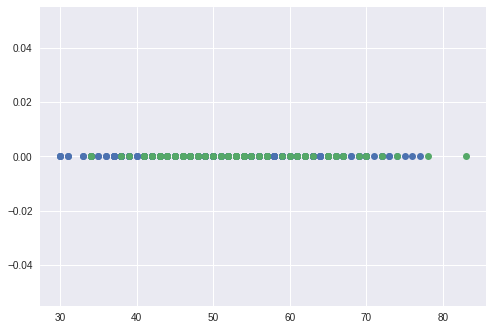

In [13]:
#1-D scatter plot
haberman_1 = haberman.loc[haberman['status'] == 1]
haberman_2 = haberman.loc[haberman['status'] == 2]

plt.plot(haberman_1['nodes'], np.zeros_like(haberman_1['nodes']),'o')
plt.plot(haberman_2['nodes'], np.zeros_like(haberman_2['nodes']),'o')
plt.show()

plt.plot(haberman_1['year'], np.zeros_like(haberman_1['year']),'o')
plt.plot(haberman_2['year'], np.zeros_like(haberman_2['year']),'o')
plt.show()

plt.plot(haberman_1['age'], np.zeros_like(haberman_1['age']),'o')
plt.plot(haberman_2['age'], np.zeros_like(haberman_2['year']),'o')
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


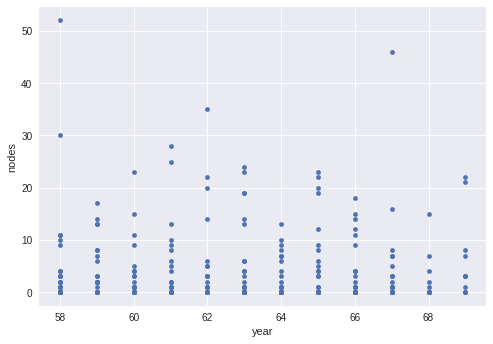

In [14]:
#2-D scatter plot
haberman.plot(kind='scatter',x='year',y='nodes');
plt.show();

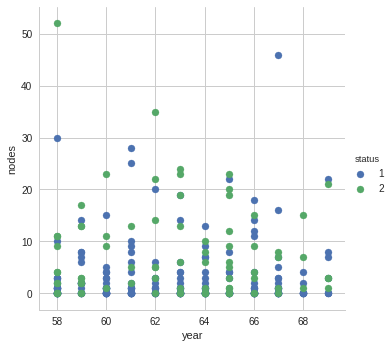

In [15]:
#2-D scatter plot with color coding based on each status
sns.set_style("whitegrid");
sns.FacetGrid(haberman, hue = "status", size = 5).map(plt.scatter, "year","nodes").add_legend();
plt.show();

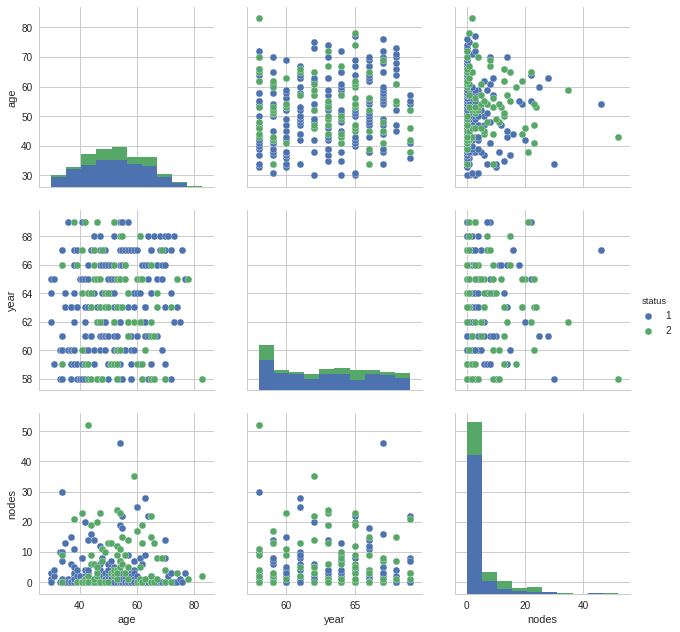

In [16]:
#Pair plot
plt.close();
sns.set_style("whitegrid");
sns.pairplot(haberman, hue="status", vars=['age','year','nodes'], size=3);
plt.show();

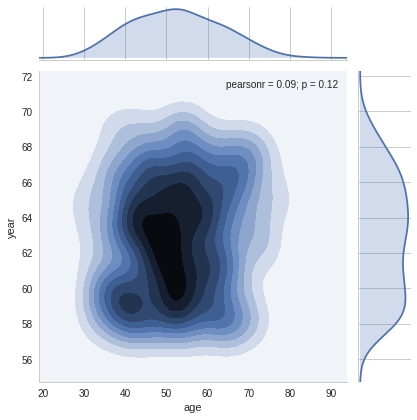

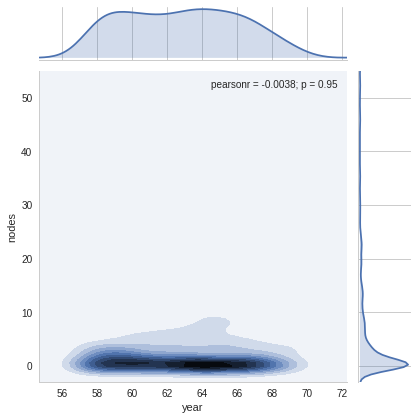

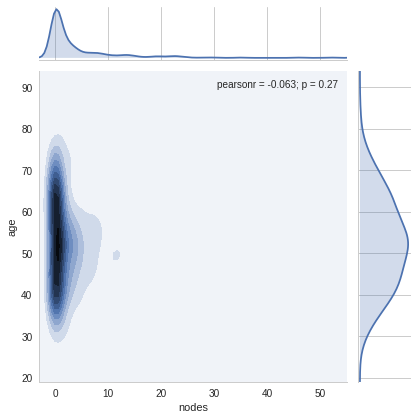

In [17]:
#Density or contour plot

sns.jointplot(x='age',y='year',data=haberman,kind='kde')
plt.show()

sns.jointplot(x='year',y='nodes',data=haberman,kind='kde')
plt.show()

sns.jointplot(x='nodes',y='age',data=haberman,kind='kde')
plt.show()

**Conclusion**: